<h1>Image Classification</h1>

This notebook develops code for a multiclass classificaction problem based on the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset following the text [Hands-On Machine Learning](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

The dataset contains images of handwritten digits, and the goal is to classify images into 10 classes, corresponding to the digits 0-9.


<h3>Libraries</h3>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

Let's load the dataset and create a training and test set.

In [3]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

We take some example to show how the images look like.

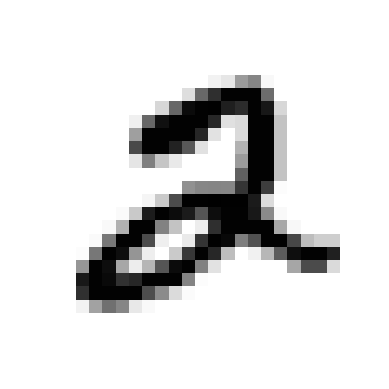

2

In [4]:
exmpl_data = X.iloc[5]
exmpl_data_reshaped = exmpl_data.values.reshape(28, 28)
plt.imshow(exmpl_data_reshaped, cmap=plt.cm.binary)
plt.axis("off")
plt.show()
y[5]

Train a stochastic gradient descent classifier usgin OvA strategy.

In [5]:
sgd_clf = SGDClassifier()

In [7]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

The prediction is correct. Let's see the decision score for each class.

In [8]:
sgd_clf.decision_function([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-12747.76854418, -27815.2703095 ,  12172.44393305,
        -15194.19454211, -13389.89591411,  -7312.95815349,
        -21659.26423554, -19731.15434021,  -1897.3881339 ,
         -7083.49037584]])

Using a OvO strategy:

In [10]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

And using RandomForest(is already multiclass so no need to use OvA or OvO):

In [12]:
from sklearn.ensemble import RandomForestClassifier 


forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
forest_clf.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

In [13]:
forest_clf.predict_proba([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.89, 0.05, 0.  , 0.02, 0.  , 0.  , 0.04, 0.  ]])

The classifier estimates a probability of 89% that te image represents a 2.